<img src="tic3151.png" style="height: 70px; width: 200px" align=left> 
<img src="logo-MMU.png" style="height: 70px; width: 200px" align=right>

### **Question 2: Programming**

### **a. A-Star Search**

### Install pymaze

In [ ]:
#pip install pyamaze

In [1]:
from pyamaze import maze,agent,textLabel,COLOR
from queue import PriorityQueue

### Maze generation

In [ ]:
#m=maze(30,30)
#m.CreateMaze(saveMaze=True, loopPercent= 40)

In [ ]:
#m=maze(35,50)
#m.CreateMaze(saveMaze=True, loopPercent = 50)

In [ ]:
#m=maze(40,40)
#m.CreateMaze(saveMaze=True)

In [ ]:
#m=maze(50,35)
#m.CreateMaze(saveMaze=True, loopPercent= 30)

In [ ]:
#m=maze(60,60)
#m.CreateMaze(saveMaze=True, loopPercent=10)

### **A\* Search**

In [2]:
# Declaring the heuristic function as manhattan distance
def h(cell1,cell2):
    x1,y1=cell1
    x2,y2=cell2
    return abs(x1-x2) + abs(y1-y2)

def aStar(m,start):
    # inf = infinity
    g_score={cell:float('inf') for cell in m.grid} # distance from the start node
    #print(g_score)
    g_score[start]=0
    f_score={cell:float('inf') for cell in m.grid} # total cost by summing up the g and h 
    f_score[start]=h(start,m._goal)

    open=PriorityQueue() # Priority queue is looking for the f which is having the lowest value
    open.put((h(start,m._goal),h(start,m._goal),start))
    aPath={}
    
    while not open.empty():
        currCell=open.get()[2]
        if currCell==m._goal:
            break
        for d in "ESNW":
            if m.maze_map[currCell][d]==True:
                if d=='E':
                    childCell=(currCell[0],currCell[1]+1)
                if d=='W':
                    childCell=(currCell[0],currCell[1]-1)
                if d=='N':
                    childCell=(currCell[0]-1,currCell[1])
                if d=='S':
                    childCell=(currCell[0]+1,currCell[1])

                temp_g_score=g_score[currCell]+1
                temp_f_score=temp_g_score+h(childCell,m._goal)

                if temp_f_score < f_score[childCell]:
                    g_score[childCell]=temp_g_score
                    f_score[childCell]=temp_f_score
                    open.put((temp_f_score,h(childCell,m._goal),childCell))
                    aPath[childCell]=currCell

    
    fwdPath={}
    cell=m._goal
    
    while cell!=start:
        fwdPath[aPath[cell]]=cell
        cell=aPath[cell]
    return fwdPath

### **Iterative Deepening Search**

In [3]:
def IDS(m, start):
    depth_count = 0
    frontier = [(depth_count, start)]
    explored = [start]
    
    dfsPath = {}
    while len(frontier) > 0:
        frontier.sort(key=lambda x: x[0])
        currCell = frontier.pop(0)
        cell = currCell[1]

        depth_count = currCell[0] + 1

        # explored.append(cell)

        if cell == m._goal:
            break
        
        # Finding neighbor cells
        for d in "EWSN":
            # A cell has 4 direction East, West, North, and South
            # If the direction has a wall prevent agent to move
            # Then the value of that direction is False, else True
            if m.maze_map[cell][d] == True:
                if d=="N":
                    childCell = (cell[0]-1, cell[1])
                elif d=="S":
                    childCell = (cell[0]+1, cell[1])
                elif d=="W":
                    childCell = (cell[0], cell[1]-1)
                elif d=="E":
                    childCell = (cell[0], cell[1]+1)

                # if the location has been explored                
                if childCell in explored:
                    continue
                explored.append(childCell)

                frontier.append((depth_count, childCell))
                # Set parent of this neighbor to the current cell
                dfsPath[childCell] = cell 

    # Trace back from the goal to the START cell
    fwdPath = {}
    while cell != start:
        fwdPath[dfsPath[cell]] = cell
        cell = dfsPath[cell]

    return fwdPath

### Select maze
Run 1 maze initialization out of the 5 mazes below and proceed to next section

In [ ]:
filename = 'maze30-30.csv'
start = (30,30)
goals = [(1,1), (30,1), (1,30)]

In [ ]:
filename = 'maze35-50.csv'
start = (1,1)
goals = [(35,20), (5,30), (35,1)]

In [ ]:
filename = 'maze40-40.csv'
start = (6,6)
goals = [(30,35), (1,1), (3,40)]

In [4]:
filename = 'maze50-35.csv'
start = (3,3)
goals = [(40,30), (3,6), (30,35)]

In [ ]:
filename = 'maze60-60.csv'
start = (10,10)
goals = [(55,55), (8,18), (40,60)]

### Select algorithm
Select 1 algorithm out of the 2 and run the maze


In [5]:
algorithm = 'Iterative Deepening Search'

In [ ]:
algorithm = 'A Star Search'

### Run Maze
*Instruction:
In order to change the goal during run time, hit "Spacebar"

In [6]:
import time

In [12]:
m=maze()
goal = goals[0]
m.CreateMaze(goal[0], goal[1], loadMaze= filename)

if algorithm == 'Iterative Deepening Search': 
    t0= time.time() 
    path = aStar(m,start)
    t1 = time.time()
    duration = round(t1 - t0, 4)
    m._time_AStar.append(duration)

    t0= time.time() 
    path = IDS(m,start)
    t1 = time.time()
    duration = round(t1 - t0, 4)
    m._time_IDS.append(duration)
else: #A Star Search
    t0= time.time() 
    path = IDS(m,start)
    t1 = time.time()
    duration = round(t1 - t0, 4)
    m._time_IDS.append(duration)

    t0= time.time() 
    path = aStar(m,start)
    t1 = time.time()
    duration = round(t1 - t0, 4)
    m._time_AStar.append(duration)

a=agent(m, start[0], start[1], footprints=True)
m.tracePath({a:path}, delay = 100)
l=textLabel(m, (algorithm + ' Path Length'),len(path)+1)

m.enableChangeGoal(goals, a, algorithm)

m.run()

In [8]:
m._time_AStar
m._time_IDS

[0.1566, 0.0838, 0.0558]

### Plot line chart

In [ ]:
# pip install pandas

In [ ]:
# pip install matplotlib

In [9]:
import matplotlib, pandas as pd

In [13]:
mazeName = 'maze' + str(m.rows) + '-' + str(m.cols)
print(mazeName)
df = pd.DataFrame({
   'maze10-10': [0.05, 0.07, 0.10],
   'maze10-12': [0.06, 0.08, 0.15],
    'maze10-14': [0.09, 0.08, 0.15],
    'maze10-15': [0.07, 0.10, 0.15],
    'maze10-16': [0.08, 0.13, 0.15],
   }, index=['goal 1','goal 2', 'goal 3'])

maze50-35


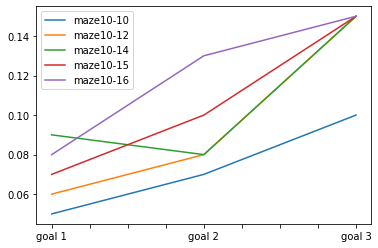

In [11]:
lines = df.plot.line()